In [39]:
"""Module Import"""

import numpy as np
import pandas as pd
import random
import tqdm
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding, TSNE
import matplotlib.offsetbox as offsetbox
import matplotlib.pyplot as plt


In [31]:
"""Hyper parameter"""

digits_data = load_digits()
X = digits_data.data
y = digits_data.target
n_samples, n_features = X.shape
n_neighbors = 30


## Locally Linear Embedding(LLE)

1. Step : 각 데이터 포인트(𝒙_𝒊)들의 이웃과의 관계를 계산

2. Step : 각 데이터 포인트(𝒙_𝒊)와 가장 가까운 이웃(𝒙_𝒋)으로부터 선형적으로 각 데이터 포인트(𝒙_𝒊)를 가장 잘 재구축하는 가중치 𝑾_𝒊𝒋 를 계산

3. Step: ② Step에서 구해진 가중치 𝑾_𝒊𝒋 를 보장하면서, 𝒙_𝒊를 저차원으로 Embedding된 𝒚_𝒊 를 구한다. 

(([], []), ([], []))

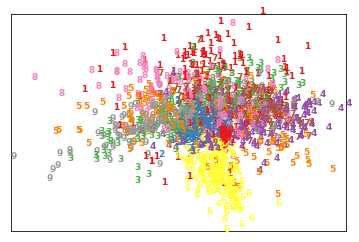

In [38]:
"""Locally Linear Embedding(LLE)"""

LLE = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                            n_components = 2,
                            eigen_solver = 'auto',
                            method='standard',)

X_LLE = LLE.fit_transform(X)

x_min, x_max = np.min(X_LLE, 0), np.max(X_LLE, 0)
X_LLE = (X_LLE - x_min) / (x_max - x_min)

plt.figure()
ax = plt.subplot(111)
for i in range(X_LLE.shape[0]):
    plt.text(X_LLE[i, 0], X_LLE[i, 1], str(digits_data.target[i]),
                color=plt.cm.Set1(y[i] / 10.),
                fontdict={'weight': 'bold', 'size': 9})

if hasattr(offsetbox, 'AnnotationBbox'):
    # only print thumbnails with matplotlib > 1.0
    shown_images = np.array([[1., 1.]])  # just something big
    for i in range(digits_data.data.shape[0]):
        dist = np.sum((X_LLE[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.r_[shown_images, [X_LLE[i]]]
        # imagebox = offsetbox.AnnotationBbox(
        #     offsetbox.OffsetImage(digits_data.images[i], cmap=plt.cm.gray_r),
        #     X_LLE[i])
        # ax.add_artist(imagebox)
plt.xticks([]), plt.yticks([])

## t-SNE

**SNE** : 이전 LLE에서는 이웃들을 Deterministic하게 산정했다면, t-sne에서는 Stochastic하게 산정. 이때, 고차원에서 i가 j를 이웃으로 택할 확률과 저차원에서 i가 j를 이웃으로 택할 확률을 같게 만들기 위하여 먼저 **KLdivergence**사용

**Symmetric SNE** : 지금까지는 𝑷_(𝒊|𝒋) 와 𝑷_(𝒋|𝒊) 의 값이 달랐다. 그러나 이를 적당한 계산을 통하여 i와 j가 이웃이 될 확률을 같게 만들어주자. 그러나 이때 Symmetric SNE이는 Gaussian 분포 때문에 Crowding problem 가진다.

이에 t-SNE에서는 Gaussian 분포가 아닌 t 분포를 통하여 i와 j가 이웃이 될 확률을 같게 만들어준다.

c:\Users\user\anaconda3\envs\JINU_DataAnalysis\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\user\anaconda3\envs\JINU_DataAnalysis\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(([], []), ([], []))

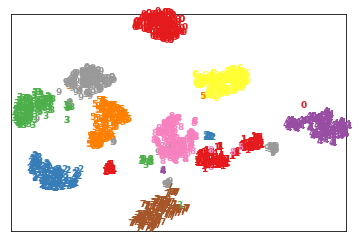

In [41]:
"""t-SNE"""

tsne = TSNE(n_components=2, init='pca', random_state=0)

X_tsne = tsne.fit_transform(X)

x_min, x_max = np.min(X_tsne, 0), np.max(X_tsne, 0)
X_tsne = (X_tsne - x_min) / (x_max - x_min)

plt.figure()
ax = plt.subplot(111)
for i in range(X_tsne.shape[0]):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(digits_data.target[i]),
                color=plt.cm.Set1(y[i] / 10.),
                fontdict={'weight': 'bold', 'size': 9})

if hasattr(offsetbox, 'AnnotationBbox'):
    # only print thumbnails with matplotlib > 1.0
    shown_images = np.array([[1., 1.]])  # just something big
    for i in range(digits_data.data.shape[0]):
        dist = np.sum((X_tsne[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.r_[shown_images, [X_tsne[i]]]
        # imagebox = offsetbox.AnnotationBbox(
        #     offsetbox.OffsetImage(digits_data.images[i], cmap=plt.cm.gray_r),
        #     X_tsne[i])
        # ax.add_artist(imagebox)
plt.xticks([]), plt.yticks([])